## Limpieza de los datos de *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df_feb = pd.read_csv('Data/Lisboa/listings0.csv.gz',compression='gzip',low_memory=False)
df_ene = pd.read_csv('Data/Lisboa/listings1.csv.gz',compression='gzip',low_memory=False)
df_dic = pd.read_csv('Data/Lisboa/listings2.csv.gz',compression='gzip',low_memory=False)
df_nov = pd.read_csv('Data/Lisboa/listings3.csv.gz',compression='gzip',low_memory=False)
df_oct = pd.read_csv('Data/Lisboa/listings4.csv.gz',compression='gzip',low_memory=False)
df_sep = pd.read_csv('Data/Lisboa/listings5.csv.gz',compression='gzip',low_memory=False)
df_ago = pd.read_csv('Data/Lisboa/listings6.csv.gz',compression='gzip',low_memory=False)
df_jul = pd.read_csv('Data/Lisboa/listings7.csv.gz',compression='gzip',low_memory=False)
df_may = pd.read_csv('Data/Lisboa/listings8.csv.gz',compression='gzip',low_memory=False)
df_abr = pd.read_csv('Data/Lisboa/listings9.csv.gz',compression='gzip',low_memory=False)



In [3]:
files = [df_feb,df_ene,df_dic,df_nov,df_oct,df_sep,df_ago,df_jul,df_may,df_abr]

df = pd.concat(files,sort=True)

In [4]:
#vemos la estructura de los datos 
df.shape

(220101, 106)

In [5]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,NaN,2,"{""Cable TV"",Wifi,""Wheelchair accessible"",Pool,...",30,365,60,90,1.0,Real Bed,1.0,...,A comfortable apartment with pool during the s...,NaN,Lisbon,"Oeiras, Lisbon, Portugal",NaN,NaN,NaN,NaN,NaN,2795
1,Normal Check in after 15h (3 PM) although we t...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",30,316,60,81,1.0,Real Bed,1.0,...,Charming sunny apartment in the heart of Alfam...,NaN,Lisboa,"Lisboa, Lisboa, Portugal",Heart of Alfama! Center of Lisbon. Sunny Char...,NaN,The apartment is very convenient to all kinds ...,$350.00,NaN,1100-571
2,to the entire apartment with fully equipped ki...,2,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",14,74,44,74,1.0,Real Bed,1.0,...,"Apartment for single or couple, 5 minutes walk...",700.0,Lisbon,"Lisbon, Lisbon, Portugal",NaN,NaN,"there are two subway lines very close by, besi...",NaN,NaN,1050
3,NaN,2,{},30,365,60,90,NaN,Real Bed,1.0,...,traditional farm house in a quiet place where ...,NaN,NaN,"Azambuja, Portugal",NaN,NaN,NaN,NaN,NaN,2050
4,NaN,1,{},30,365,60,90,NaN,Real Bed,1.0,...,"05 minutes from city center by subway, 10 minu...",NaN,Lisbon,"Lisbon, Lisbon, Portugal",NaN,NaN,NaN,NaN,NaN,1000


El **primer criterio** utilizado para simplificar la información contenida en la tabla es el de encontrar aquellas columnas prescindibles.

In [6]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las que son solo de consulta, 

a_borrar_consulta = ['listing_url','host_url']

#campos de texto sin relevancia, variables redundantes o URL`s que no nos sirven para el análisis. 
#Normalmente los campos de texto no vienen predeterminados por AirBnb y por tanto no tienen formato establecido.

a_borrar_texto = ['summary','space','neighborhood_overview','notes'
                     ,'transit','access','interaction','house_rules','host_name']
a_borrar_redundantes = ['scrape_id','calendar_last_scraped','jurisdiction_names','country'
                        ,'country_code','street','market','smart_location','host_location','zipcode','state'
                       ,'neighbourhood']
a_borrar_urls = ['thumbnail_url','picture_url','medium_url','xl_picture_url','host_thumbnail_url',
                 'host_picture_url','host_url','listing_url']

#Las siguientes columnas son eliminadas por el desconocimiento del método de cálculo o por no comprender que significan

a_borrar_desconocidas = ['is_location_exact','maximum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights'
                        ,'minimum_maximum_nights','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
#Las siguientes hacen referencia al método de scrapping o están condicionadas por el momento concreto en el que se hizo

a_borrar_scrapping = ['maximum_nights','minimum_nights','calendar_updated','has_availability']

#Por último, estos requerimientos no son necesarios:

a_borrar_irrelevantes = ['require_guest_profile_picture','require_guest_phone_verification','experiences_offered'
                         ,'host_has_profile_pic']

In [7]:
#Juntamos todas las columnas, las eliminamos y comprobamos cuánto se han reducido
Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
df.drop(Useless,axis=1,inplace=True)
df.shape


(220101, 61)

El **segundo criterio** para reducir las dimensiones es eliminar aquellas columnas que contengan al menos un 30% de nulos, ya que no serán útiles con tanta información perdida.

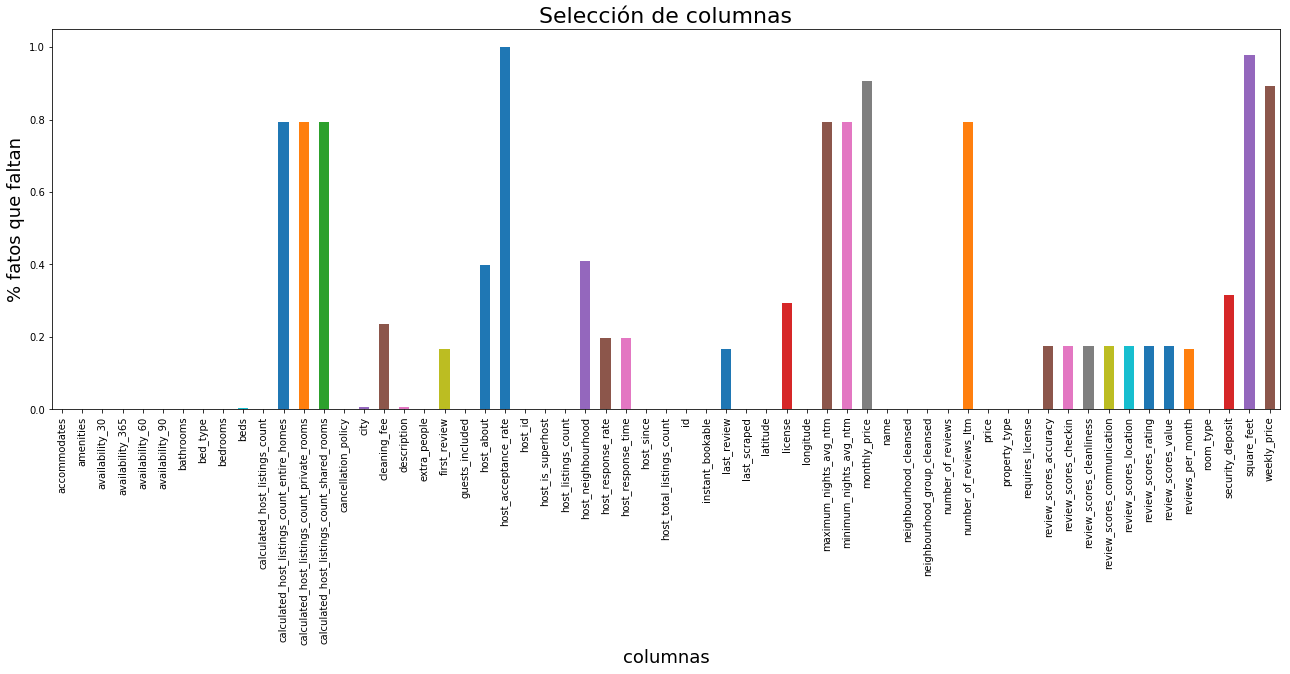

In [8]:
#Representamos gráficamente el % de nulos de las columnas restantes
missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [9]:
nulos = missing.loc[missing > 0.3].index
nulos_lista = list(nulos)
#Dejamos las siguientes columnas aunque tengan muchos nulos ya que pueden ser importantes para los periodos que están disponibles
nulos_lista.remove('maximum_nights_avg_ntm')
nulos_lista.remove('minimum_nights_avg_ntm')
nulos_lista.remove('number_of_reviews_ltm')
nulos_lista.remove('host_neighbourhood')
nulos_lista

['calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'host_about',
 'host_acceptance_rate',
 'monthly_price',
 'security_deposit',
 'square_feet',
 'weekly_price']

In [10]:
#Tenemos 62 columnas para realizar el análisis, pudiendo ser reducidas en el futuro en caso de ser considerado.
df.drop(nulos_lista, axis = 1, inplace = True)
df.shape

(220101, 52)

In [11]:
filenames = ['Data/Madrid/listings0.csv.gz','Data/Madrid/listings1.csv.gz',
             'Data/Madrid/listings2.csv.gz','Data/Madrid/listings3.csv.gz',
             'Data/Madrid/listings4.csv.gz','Data/Madrid/listings5.csv.gz',
             'Data/Madrid/listings6.csv.gz','Data/Madrid/listings7.csv.gz',
             'Data/Madrid/listings8.csv.gz','Data/Madrid/listings9.csv.gz']
months = ['ene','dic','oct','sep','ago','jul','may','abr','ene']


In [12]:
#Comprobamos las columnas restantes
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,...,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type
0,2,"{""Cable TV"",Wifi,""Wheelchair accessible"",Pool,...",30,365,60,90,1.0,Real Bed,1.0,1.0,...,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room
1,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",30,316,60,81,1.0,Real Bed,1.0,2.0,...,t,10.0,10.0,10.0,10.0,10.0,96.0,10.0,1.64,Entire home/apt
2,2,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",14,74,44,74,1.0,Real Bed,1.0,1.0,...,t,10.0,10.0,8.0,10.0,10.0,87.0,9.0,0.06,Entire home/apt
3,2,{},30,365,60,90,NaN,Real Bed,1.0,NaN,...,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room
4,1,{},30,365,60,90,NaN,Real Bed,1.0,NaN,...,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room


In [13]:
#Pasamos las fechas de formato texto a fecha
df.last_scraped = pd.to_datetime(df.last_scraped)
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.last_scraped.dtype

dtype('<M8[ns]')

In [14]:
df.shape

(220101, 52)

In [ ]:
#Reemplazamos valores [t,f] por [True, False]

df.host_is_superhost = df.host_is_superhost.str.replace("f","0")
df.host_is_superhost = df.host_is_superhost.str.replace("t","1")




In [ ]:
df.requires_license = df.requires_license.str.replace("f","0")
df.requires_license = df.requires_license.str.replace("t","1")

In [ ]:
df.instant_bookable = df.instant_bookable.str.replace("f","0")
df.instant_bookable = df.instant_bookable.str.replace("t","1")

In [ ]:
df.instant_bookable.head()

In [ ]:
df.host_is_superhost = df.host_is_superhost.astype(bool)
df.requires_license = df.requires_license.astype(bool)
df.instant_bookable = df.instant_bookable.astype(bool)

In [ ]:
#Comprobamos que está en booleano
df.requires_license.dtype

### Las políticas de cancelación del AirBnb son las siguientes:

* Flexible: Si la cancelación se hace con al menos 24h de antelación el huésped tiene derecho a una devolución completa.  Si es con menos de 24h la primera noche no será reembolsada, siendo el resto de los días reembolsados.

* Moderate: La cancelación se debe hacer o bien 48h después de la reserva o 5 días antes de la llegada para obtener reembolso completo.  Si se cancela con menos de 5 días de antelación se reembolsará el *50%* de las noches sin contar la primera.

* Strict_14_with_grace_period: La cancelación se debe hacer o bien 48h después de la reserva o *14* días antes de la llegada para obtener reembolso completo.  Para obtener el 50% del reembolso se debe cancelar con al menos 7 dias completos antes del día y hora local.  Con menos de 7 dias no hay reembolso.

* Super_strict_30: Si la cancelación se produce con al menos 30 días se reembolsa el 50%.

* Super_strict_60: Si la cancelación se produce con al menos 60 días se reembolsa el 50%.

* Long_term: Se aplica a huéspedes que están 28 días o más. El primer mes lo cobra el host sea cual sea la cancelación.

In [ ]:
df.cancellation_policy.value_counts()

In [ ]:
df.room_type.value_counts()

In [ ]:
#Pasamos a categórica con cinco y tres niveles respectivamente
df.cancellation_policy = pd.Categorical(df.cancellation_policy, ['flexible','moderate'
                                                                         ,'strict_14_with_grace_period',
                                                                        'super_strict_30',
                                                                         'super_strict_60'],ordered=True)

df.room_type = pd.Categorical(df.room_type, ['Entire home/apt','Private room','Shared room'],ordered=True)


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#Buscamos si el valor centro de City se corresponde con Madrid para admitirlo como válido
df.loc[df.city == "Centro"]

In [ ]:
#Seleccionamos aquellos valores para los que validaremos que pertenecen a Madrid
df.city.value_counts()
df = df[df.city.isin(["Madrid","MADRID","Centro","Madrid Center",
"Madrid, Comunidad de Madrid, ES","madrid"," Madrid"])]

In [ ]:
cities = list(df.city.value_counts().index)

for x in cities:
    df.city = df.city.str.replace(x,"Madrid")

In [ ]:
#Comprobamos que los valores se han sustituido correctamente
df.city.value_counts()

In [ ]:
df.state.value_counts()

In [ ]:
#Comprobamos que la columna neighbourhood contiene la información más precisa
df.neighbourhood.value_counts()

In [ ]:
df.neighbourhood_group_cleansed.value_counts(dropna = False)

In [ ]:
df.shape

In [ ]:
#Comprobamos las columnas restantes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

In [ ]:
#Cambiar a integer, bedrooms, bedsdf.beds.value_counts()